In [45]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

sys.path.insert(0, os.path.join("..", "..", "..", "estimators"))

plt.rc("text", usetex=True)

### Multivariate normal distribution

In [2]:
a, b = -3, 3
n_points = 200

x, y = np.linspace(a, b, n_points), np.linspace(a, b, n_points)
X, Y = np.meshgrid(x, y)
Z = np.column_stack((X.flatten(), Y.flatten()))

In [3]:
mu = np.zeros(2)
sigma = np.array([[1., 0.8], [0.8, 1.]])

pdf = stats.multivariate_normal.pdf(Z, mu, sigma).reshape(n_points, n_points)

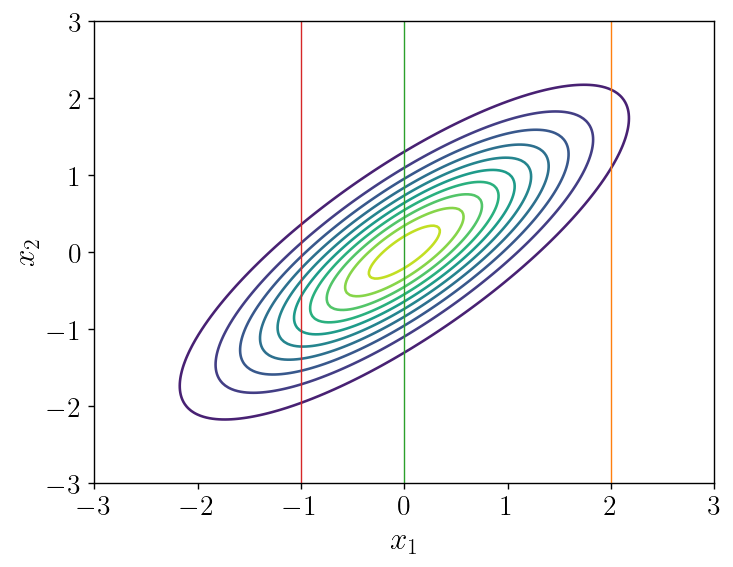

In [4]:
plt.figure(dpi=125)

# plt.contourf(X, Y, pdf, origin="lower", levels=10)
plt.contour(X, Y, pdf, origin="lower", levels=10)

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)
plt.tick_params(labelsize=16)

w = 0.8
plt.axvline(-1, color="tab:red", linewidth=w)
plt.axvline(0, color="tab:green", linewidth=w)
plt.axvline(2, color="tab:orange", linewidth=w)

# plt.savefig("2d_pdf.png", bbox_inches="tight")
plt.show()

In [5]:
pdf0 = stats.multivariate_normal.pdf(y, mu[1], sigma[1, 1])

pdf1 = stats.multivariate_normal.pdf(np.column_stack((-1*np.ones_like(y), y)), mu, sigma)
pdf2 = stats.multivariate_normal.pdf(np.column_stack((0*np.ones_like(y), y)), mu, sigma)
pdf3 = stats.multivariate_normal.pdf(np.column_stack((2*np.ones_like(y), y)), mu, sigma)

pdf1 /= ((y[1]-y[0]) * pdf1.sum())
pdf2 /= ((y[1]-y[0]) * pdf2.sum())
pdf3 /= ((y[1]-y[0]) * pdf3.sum())

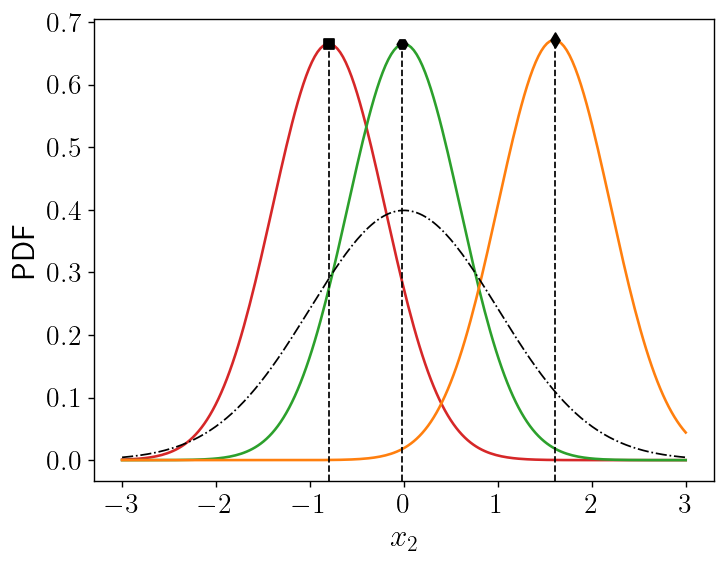

In [6]:
im1, im2, im3 = pdf1.argmax(), pdf2.argmax(), pdf3.argmax()

plt.figure(dpi=125)

plt.plot(y, pdf1, color="tab:red")
plt.plot(y, pdf2, color="tab:green")
plt.plot(y, pdf3, color="tab:orange")

plt.plot(y, pdf0, color="black", linewidth=1, linestyle="-.")

plt.axvline(y[im1], ymax=0.95, linestyle="--", color="black", linewidth=1)
plt.axvline(y[im2], ymax=0.95, linestyle="--", color="black", linewidth=1)
plt.axvline(y[im3], ymax=0.95, linestyle="--", color="black", linewidth=1)
# plt.vlines(y[im1], ymin=0, ymax=pdf1[im1], linestyle="--", color="black", linewidth=1)
# plt.vlines(y[im2], ymin=0, ymax=pdf2[im2], linestyle="--", color="black", linewidth=1)
# plt.vlines(y[im3], ymin=0, ymax=pdf3[im3], linestyle="--", color="black", linewidth=1)

plt.scatter(y[im1], pdf1[im1], color="black", marker="s", zorder=2)
plt.scatter(y[im2], pdf2[im2], color="black", marker="H", zorder=2)
plt.scatter(y[im3], pdf3[im3], color="black", marker="d", zorder=2)
# plt.scatter(y[[im1, im2, im3]], [pdf1[im1], pdf2[im2], pdf3[im3]], color="black", marker="d", zorder=2)

plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("PDF", fontsize=18)
plt.tick_params(labelsize=16)

# plt.savefig("1d_pdfs.png", bbox_inches="tight")
plt.show()